<a href="https://colab.research.google.com/github/jonathan-schwarz/TxGNNv2/blob/main/analyse_finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Install
!pip install -q matplotlib
!pip install -q numpy
!pip install -q seaborn
!pip install -q scikit-learn
!pip install -q torch
!pip install -q wandb

In [2]:
#@title Imports & Setup

import collections
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import wandb

In [3]:
data = np.load('/n/holystore01/LABS/mzitnik_lab/Users/jschwarz/TxGNNv2/data/pretrained_mine/complex_disease_matrix/matrix/test_matrix_drug_indication_disease_bandit_eval.npz')

drug_names = data['u_names']
diasease_names = data['v_names']

In [10]:
run = 'schwarzjn/TxGNNv2/9lbqg3jr' #@param
filename = 'bandit_eval_outcomes.npz' #@param
wandb.restore(filename, run_path=run)
data = np.load('bandit_eval_outcomes.npz')
bandit_eval_outcomes = data['true_outcomes']
optimal_rewards = data['optimal_rewards']
real_rewards = data['real_rewards']

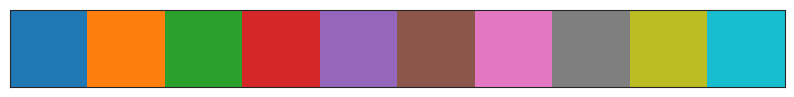

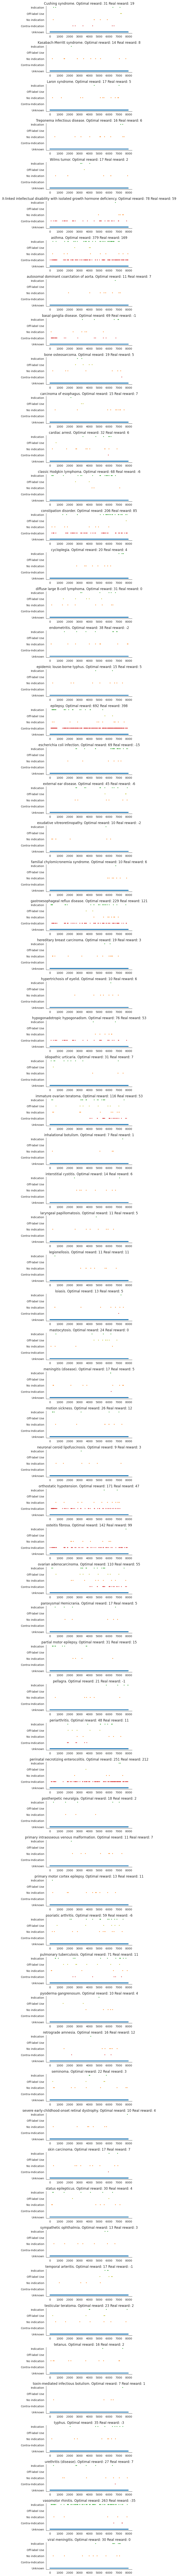

In [11]:
colors = sns.color_palette()
sns.palplot(colors)


sns.set_style('white')
n_rows = 66
_, ax = plt.subplots(n_rows, 1, figsize=(6, n_rows*2))

def _get_color(i):
    if i == 0:
        # No Indication
        return colors[1]
    elif i == 1:
         # Indication
        return colors[2]       
    elif i == 2:
         # Contra-Indication
        return colors[3]     
    elif i == 3:
         # Off-label Use
        return colors[-2]
    elif i == 4:
         # Unknown
        return colors[0]

def relabel(i):
    if i == 0:
        # No Indication
        return 2
    elif i == 1:
         # Indication
        return 4
    elif i == 2:
         # Contra-Indication
        return 1
    elif i == 3:
         # Off-label Use
        return 3
    elif i == 4:
         # Unknown
        return 0
    

for which_one in range(n_rows):
    #print(collections.Counter(bandit_eval_outcomes[which_one]))
    x = np.arange(bandit_eval_outcomes[which_one].shape[0])
    c = [_get_color(bandit_eval_outcomes[which_one][i]) for i in range(bandit_eval_outcomes.shape[1])]
    y = [relabel(bandit_eval_outcomes[which_one][i]) for i in range(bandit_eval_outcomes.shape[1])]

    ax[which_one].scatter(x=x, y=y, c=c, s=3)
    ax[which_one].set_yticks([0, 1, 2, 3, 4])
    ax[which_one].set_yticklabels(['Unknown', 'Contra-Indication', 'No indication', 'Off-label Use', 'Indication'])
    ax[which_one].set_title('{}. Optimal reward: {} Real reward: {}'.format(
        diasease_names[which_one][0], optimal_rewards[which_one], real_rewards[which_one]))

sns.despine()
plt.tight_layout()